In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('../../data/raw/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [58]:
usefullColumn = ['Id','LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'YearBuilt', 'OverallQual', 'OverallCond', 'ExterQual', 'KitchenQual', 'GarageQual', 'BsmtQual', 'Neighborhood', 'MSZoning', 'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']

df = df[usefullColumn]
df

,Id,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,YearBuilt,OverallQual,...,Neighborhood,MSZoning,YearRemodAdd,GarageYrBlt,Fireplaces,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,SalePrice
0,1,8450,1710,856,856,854,548,0,2003,7,...,CollgCr,RL,2003,2003.0,0,1,2,3,1,208500
1,2,9600,1262,1262,1262,0,460,298,1976,6,...,Veenker,RL,1976,1976.0,1,0,2,3,1,181500
2,3,11250,1786,920,920,866,608,0,2001,7,...,CollgCr,RL,2002,2001.0,1,1,2,3,1,223500
3,4,9550,1717,756,961,756,642,0,1915,7,...,Crawfor,RL,1970,1998.0,1,1,1,3,1,140000
4,5,14260,2198,1145,1145,1053,836,192,2000,8,...,NoRidge,RL,2000,2000.0,1,1,2,4,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1647,953,953,694,460,0,1999,6,...,Gilbert,RL,2000,1999.0,1,0,2,3,1,175000
1456,1457,13175,2073,1542,2073,0,500,349,1978,6,...,NWAmes,RL,1988,1978.0,2,1,2,3,1,210000
1457,1458,9042,2340,1152,1188,1152,252,0,1941,7,...,Crawfor,RL,2006,1941.0,2,0,2,4,1,266500
1458,1459,9717,1078,1078,1078,0,240,366,1950,5,...,NAmes,RL,1996,1950.0,0,1,1,2,1,142125


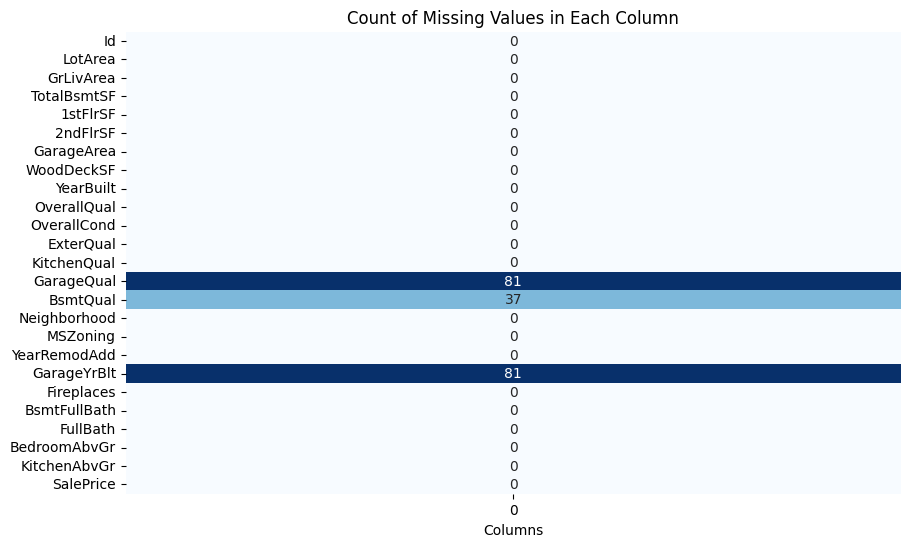

In [59]:
missing_values = df.isna().sum()
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
plt.show()

In [60]:
df = df.dropna(subset=['GarageQual', 'BsmtQual', 'GarageYrBlt', 'KitchenQual', 'MSZoning'])
df

,Id,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,YearBuilt,OverallQual,...,Neighborhood,MSZoning,YearRemodAdd,GarageYrBlt,Fireplaces,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,SalePrice
0,1,8450,1710,856,856,854,548,0,2003,7,...,CollgCr,RL,2003,2003.0,0,1,2,3,1,208500
1,2,9600,1262,1262,1262,0,460,298,1976,6,...,Veenker,RL,1976,1976.0,1,0,2,3,1,181500
2,3,11250,1786,920,920,866,608,0,2001,7,...,CollgCr,RL,2002,2001.0,1,1,2,3,1,223500
3,4,9550,1717,756,961,756,642,0,1915,7,...,Crawfor,RL,1970,1998.0,1,1,1,3,1,140000
4,5,14260,2198,1145,1145,1053,836,192,2000,8,...,NoRidge,RL,2000,2000.0,1,1,2,4,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1647,953,953,694,460,0,1999,6,...,Gilbert,RL,2000,1999.0,1,0,2,3,1,175000
1456,1457,13175,2073,1542,2073,0,500,349,1978,6,...,NWAmes,RL,1988,1978.0,2,1,2,3,1,210000
1457,1458,9042,2340,1152,1188,1152,252,0,1941,7,...,Crawfor,RL,2006,1941.0,2,0,2,4,1,266500
1458,1459,9717,1078,1078,1078,0,240,366,1950,5,...,NAmes,RL,1996,1950.0,0,1,1,2,1,142125


In [61]:
df = df.rename(columns={
    'LotArea': 'Surface_logement',
    'GrLivArea': 'Surface_habitable',
    'TotalBsmtSF': 'Surface_basement',
    '1stFlrSF': 'Surface_1ere_plan',
    '2ndFlrSF': 'Surface_2eme_plan',
    'GarageArea': 'Surface_garage',
    'WoodDeckSF': 'Surface_pavage',
    'YearBuilt': 'Annee_construction',
    'ExterQual': 'Qualite_exterieure',
    'KitchenQual': 'Qualite_cuisine',
    'GarageQual': 'Qualite_garage',
    'BsmtQual': 'Qualite_basement',
    'Neighborhood': 'Quartier',
    'MSZoning': 'Type_zone',
    'YearRemodAdd': 'Annee_remodage',
    'GarageYrBlt': 'Annee_garage',
    'Fireplaces': 'Nombre_chemines',
    'BsmtFullBath': 'Nombre_basement_baignoire',
    'FullBath': 'Nombre_baignoire',
    'BedroomAbvGr': 'Nombre_chambres_par_etage',
    'KitchenAbvGr': 'Nombre_cuisine_par_etage'
})

In [62]:
df.to_csv('../../data/processed/train.csv', index=False)